Menampilkan grafik di layar...


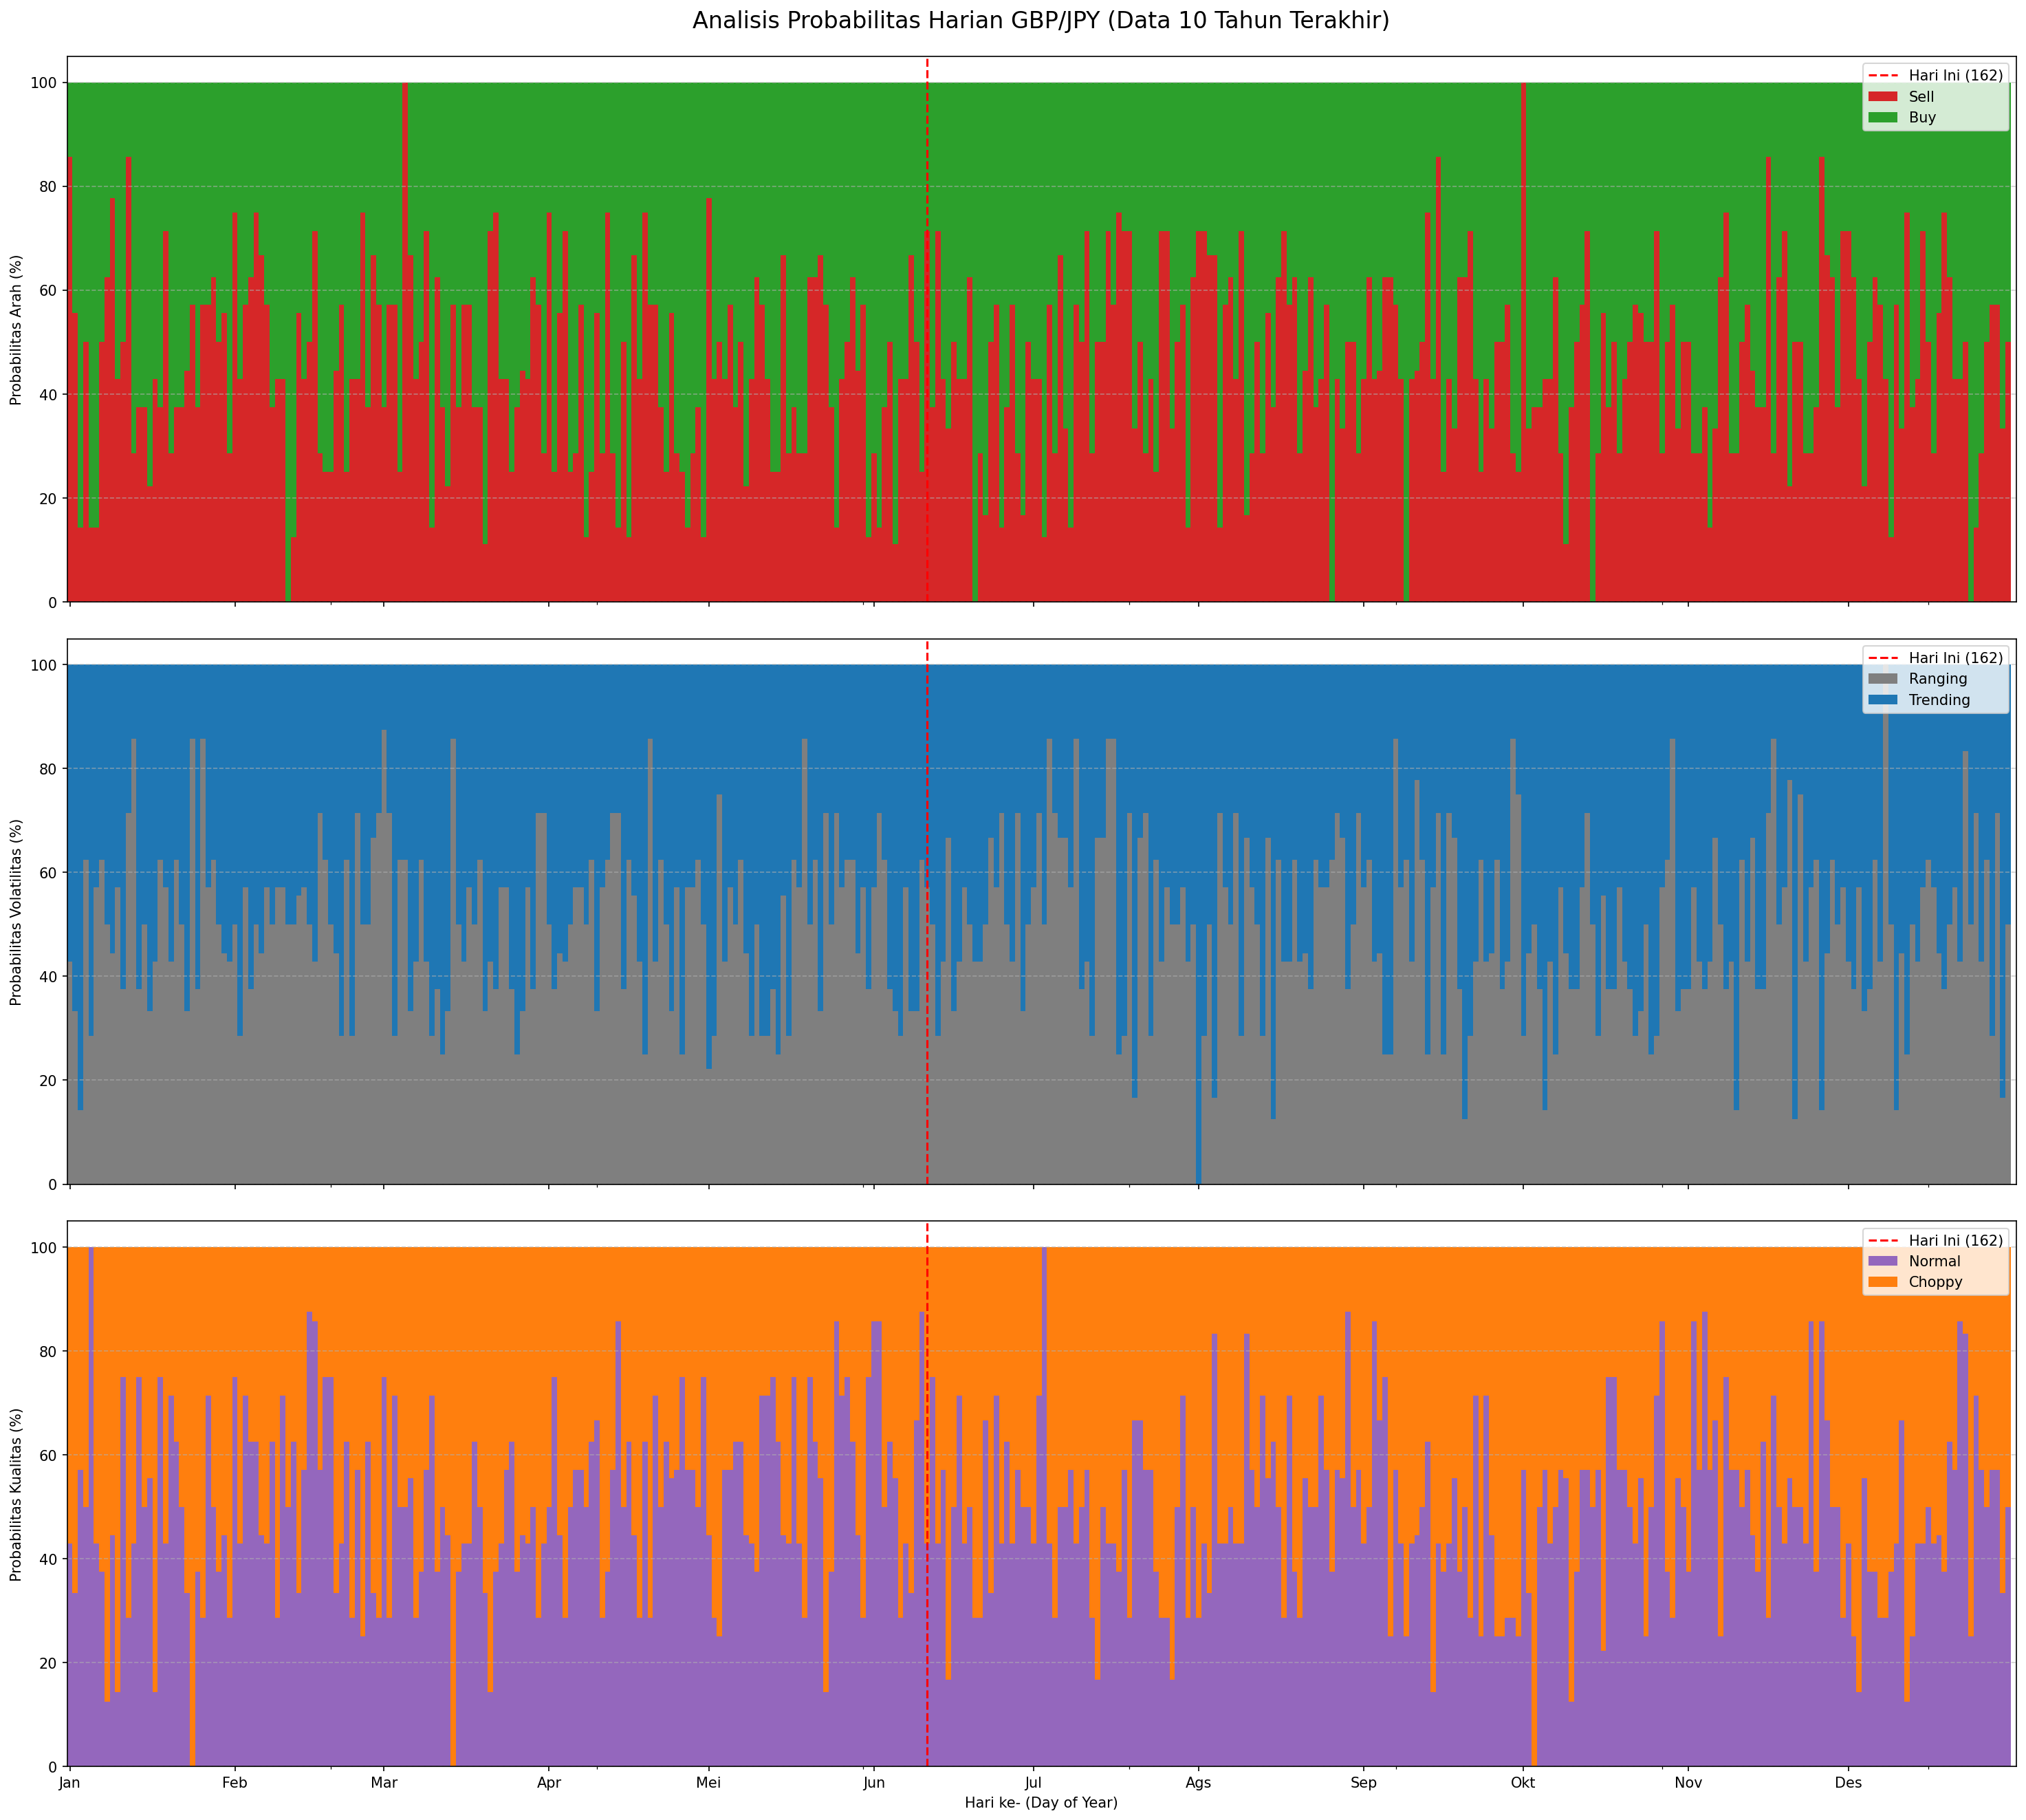


📊 Analisis Probabilitas Harian GBP/JPY
📅 Hari ini (11 June 2025) adalah hari ke-162 dalam setahun.

Ringkasan Probabilitas untuk Hari Ini (Hari ke-162)
Berdasarkan data historis 10 tahun terakhir:

--- 1. Probabilitas Arah ---
  🟢 Kecenderungan Buy      : 75.00%
  🔴 Kecenderungan Sell     : 25.00%

--- 2. Probabilitas Volatilitas ---
  🔵 Kecenderungan Trending : 37.50%
  ⚪ Kecenderungan Ranging  : 62.50%

--- 3. Probabilitas Kualitas ---
  🟠 Kecenderungan Choppy   : 12.50%
  🟣 Kecenderungan Normal   : 87.50%



In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

# --- 1. Pengaturan Awal (Folder & Nama File) ---
input_csv_filename = "GBPJPY_Daily_201608110000_202506110000.csv"
today = datetime.now()
today_str = today.strftime('%Y-%m-%d')
output_folder = "Seasonal Data"

# Buat folder jika belum ada
os.makedirs(output_folder, exist_ok=True)

# --- Nama File Output ---
# Hanya definisikan file output untuk ringkasan teks
summary_txt_filename = f"{today_str}-{input_csv_filename.replace('.csv','')} - summary.txt"
summary_txt_filepath = os.path.join(output_folder, summary_txt_filename)


# --- 2. Muat & siapkan data ---
try:
    df = pd.read_csv(input_csv_filename, delim_whitespace=True)
except FileNotFoundError:
    print(f"Error: Pastikan file '{input_csv_filename}' berada di direktori yang sama.")
    exit()

df.columns = [c.strip('<>') for c in df.columns]
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y.%m.%d')
df.set_index('DATE', inplace=True)
df.dropna(inplace=True)

# --- 3. Hitung metrik turunan & klasifikasikan rezim ---
df['direction'] = np.where(df['CLOSE'] > df['OPEN'], 'Buy', 'Sell')
df['range_body'] = (df['CLOSE'] - df['OPEN']).abs()
df['year'] = df.index.year
df['day_of_year'] = df.index.dayofyear

def classify_regimes(group):
    median_range = group['range_body'].quantile(0.5)
    group['regime_volatility'] = np.where(group['range_body'] >= median_range, 'Trending', 'Ranging')
    group['wick_size'] = (df['HIGH'] - df['LOW']) - df['range_body']
    median_wick = group['wick_size'].quantile(0.5)
    group['regime_quality'] = np.where(group['wick_size'] >= median_wick, 'Choppy', 'Normal')
    return group

df = df.groupby('year', group_keys=False).apply(classify_regimes)

# --- 4. Filter data untuk 10 tahun terakhir ---
latest_years = sorted(df['year'].unique())[-10:]
df = df[df['year'].isin(latest_years)]

# --- 5. Hitung probabilitas untuk setiap kategori ---
prob_direction = df.groupby(['day_of_year', 'direction']).size().unstack(fill_value=0).div(df.groupby('day_of_year').size(), axis=0) * 100
prob_volatility = df.groupby(['day_of_year', 'regime_volatility']).size().unstack(fill_value=0).div(df.groupby('day_of_year').size(), axis=0) * 100
prob_quality = df.groupby(['day_of_year', 'regime_quality']).size().unstack(fill_value=0).div(df.groupby('day_of_year').size(), axis=0) * 100

# Dapatkan nomor hari dalam setahun untuk penanda grafik
day_of_year_num = today.timetuple().tm_yday

# --- 6. Buat dan Tampilkan Plot ---
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 18), sharex=True, dpi=150)
colors_direction = {'Buy': '#2ca02c', 'Sell': '#d62728'}
prob_direction.reindex(columns=['Sell', 'Buy']).plot(kind='bar', stacked=True, ax=axes[0], color=colors_direction, width=1.0)
axes[0].set_ylabel('Probabilitas Arah (%)')
axes[0].set_title('Analisis Probabilitas Harian GBP/JPY (Data 10 Tahun Terakhir)', pad=20, fontsize=16)

colors_volatility = {'Trending': '#1f77b4', 'Ranging': '#7f7f7f'}
prob_volatility.reindex(columns=['Ranging', 'Trending']).plot(kind='bar', stacked=True, ax=axes[1], color=colors_volatility, width=1.0)
axes[1].set_ylabel('Probabilitas Volatilitas (%)')

colors_quality = {'Normal': '#9467bd', 'Choppy': '#ff7f0e'}
prob_quality.reindex(columns=['Normal', 'Choppy']).plot(kind='bar', stacked=True, ax=axes[2], color=colors_quality, width=1.0)
axes[2].set_ylabel('Probabilitas Kualitas (%)')
axes[2].set_xlabel('Hari ke- (Day of Year)')

for ax in axes:
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.axvline(x=day_of_year_num, color='red', linestyle='--', linewidth=1.5, label=f'Hari Ini ({day_of_year_num})')
    ax.legend(loc='upper right')

tick_locations = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
tick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des']
plt.xticks(ticks=tick_locations, labels=tick_labels, rotation=0, ha='center')
plt.xlim(0.5, 366.5)

fig.tight_layout(pad=2.0)
# Grafik hanya ditampilkan, tidak disimpan
print("Menampilkan grafik di layar...")
plt.show()

# --- 7. Buat Teks Ringkasan ---
summary_lines = []
summary_lines.append(f"📊 Analisis Probabilitas Harian GBP/JPY")
summary_lines.append(f"📅 Hari ini ({today.strftime('%d %B %Y')}) adalah hari ke-{day_of_year_num} dalam setahun.")
summary_lines.append("\n" + "="*55)
summary_lines.append(f"Ringkasan Probabilitas untuk Hari Ini (Hari ke-{day_of_year_num})")
summary_lines.append("Berdasarkan data historis 10 tahun terakhir:")
summary_lines.append("="*55)

def get_prob_details_lines(name, prob_df, day_num, labels_colors):
    lines = []
    lines.append(f"\n--- {name} ---")
    if day_num in prob_df.index:
        for label, color_char in labels_colors.items():
            prob = prob_df.loc[day_num].get(label, 0)
            lines.append(f"  {color_char} Kecenderungan {label.ljust(9)}: {prob:.2f}%")
    else:
        lines.append("  Data tidak tersedia.")
    return lines

summary_lines.extend(get_prob_details_lines("1. Probabilitas Arah", prob_direction, day_of_year_num, {'Buy': '🟢', 'Sell': '🔴'}))
summary_lines.extend(get_prob_details_lines("2. Probabilitas Volatilitas", prob_volatility, day_of_year_num, {'Trending': '🔵', 'Ranging': '⚪'}))
summary_lines.extend(get_prob_details_lines("3. Probabilitas Kualitas", prob_quality, day_of_year_num, {'Choppy': '🟠', 'Normal': '🟣'}))
summary_lines.append("\n" + "="*55)

summary_text = "\n".join(summary_lines)
# Tampilkan ringkasan di konsol
print("\n" + summary_text)

Menampilkan grafik di layar...


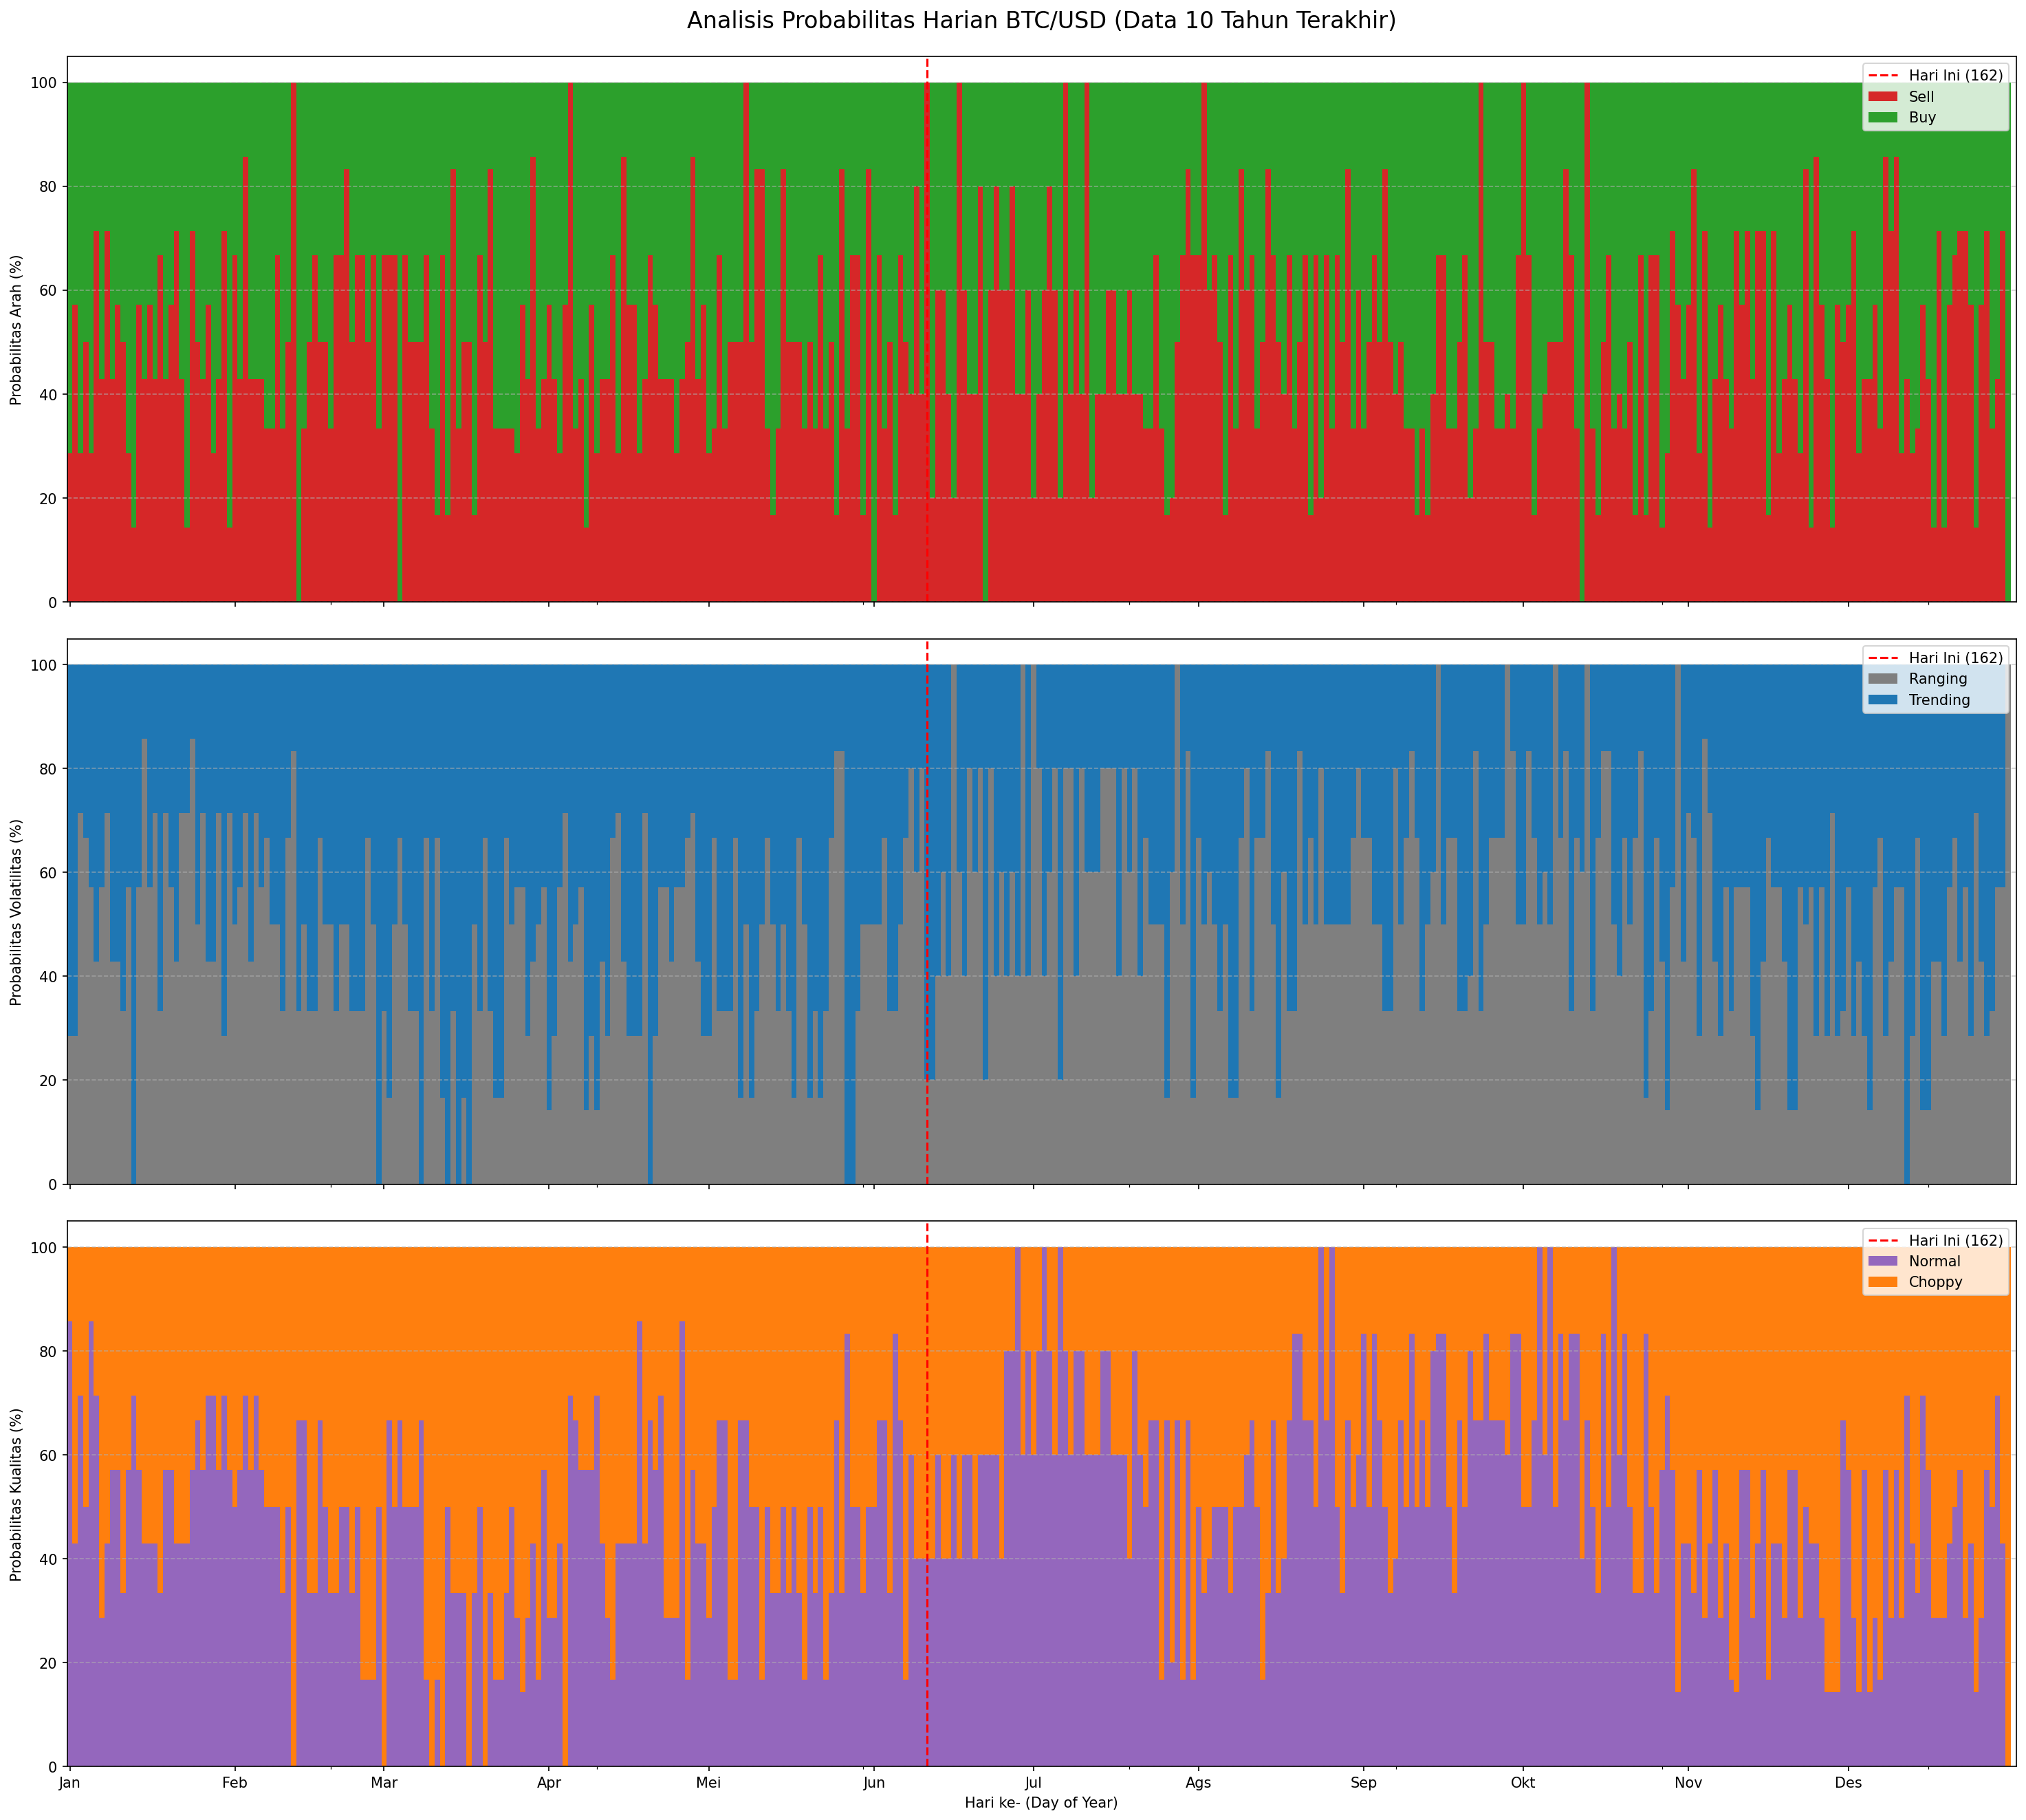


📊 Analisis Probabilitas Harian BTC/USD
📅 Hari ini (11 June 2025) adalah hari ke-162 dalam setahun.

Ringkasan Probabilitas untuk Hari Ini (Hari ke-162)
Berdasarkan data historis 10 tahun terakhir:

--- 1. Probabilitas Arah ---
  🟢 Kecenderungan Buy      : 60.00%
  🔴 Kecenderungan Sell     : 40.00%

--- 2. Probabilitas Volatilitas ---
  🔵 Kecenderungan Trending : 20.00%
  ⚪ Kecenderungan Ranging  : 80.00%

--- 3. Probabilitas Kualitas ---
  🟠 Kecenderungan Choppy   : 60.00%
  🟣 Kecenderungan Normal   : 40.00%



In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

# --- 1. Pengaturan Awal (Folder & Nama File) ---
input_csv_filename = "BTCUSD_Daily_201803270000_202506080000.csv"
today = datetime.now()
today_str = today.strftime('%Y-%m-%d')
output_folder = "Seasonal Data"

# Buat folder jika belum ada
os.makedirs(output_folder, exist_ok=True)

# --- Nama File Output ---
# Hanya definisikan file output untuk ringkasan teks
summary_txt_filename = f"{today_str}-{input_csv_filename.replace('.csv','')} - summary.txt"
summary_txt_filepath = os.path.join(output_folder, summary_txt_filename)


# --- 2. Muat & siapkan data ---
try:
    df = pd.read_csv(input_csv_filename, delim_whitespace=True)
except FileNotFoundError:
    print(f"Error: Pastikan file '{input_csv_filename}' berada di direktori yang sama.")
    exit()

df.columns = [c.strip('<>') for c in df.columns]
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y.%m.%d')
df.set_index('DATE', inplace=True)
df.dropna(inplace=True)

# --- 3. Hitung metrik turunan & klasifikasikan rezim ---
df['direction'] = np.where(df['CLOSE'] > df['OPEN'], 'Buy', 'Sell')
df['range_body'] = (df['CLOSE'] - df['OPEN']).abs()
df['year'] = df.index.year
df['day_of_year'] = df.index.dayofyear

def classify_regimes(group):
    median_range = group['range_body'].quantile(0.5)
    group['regime_volatility'] = np.where(group['range_body'] >= median_range, 'Trending', 'Ranging')
    group['wick_size'] = (df['HIGH'] - df['LOW']) - df['range_body']
    median_wick = group['wick_size'].quantile(0.5)
    group['regime_quality'] = np.where(group['wick_size'] >= median_wick, 'Choppy', 'Normal')
    return group

df = df.groupby('year', group_keys=False).apply(classify_regimes)

# --- 4. Filter data untuk 10 tahun terakhir ---
latest_years = sorted(df['year'].unique())[-10:]
df = df[df['year'].isin(latest_years)]

# --- 5. Hitung probabilitas untuk setiap kategori ---
prob_direction = df.groupby(['day_of_year', 'direction']).size().unstack(fill_value=0).div(df.groupby('day_of_year').size(), axis=0) * 100
prob_volatility = df.groupby(['day_of_year', 'regime_volatility']).size().unstack(fill_value=0).div(df.groupby('day_of_year').size(), axis=0) * 100
prob_quality = df.groupby(['day_of_year', 'regime_quality']).size().unstack(fill_value=0).div(df.groupby('day_of_year').size(), axis=0) * 100

# Dapatkan nomor hari dalam setahun untuk penanda grafik
day_of_year_num = today.timetuple().tm_yday

# --- 6. Buat dan Tampilkan Plot ---
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 18), sharex=True, dpi=150)
colors_direction = {'Buy': '#2ca02c', 'Sell': '#d62728'}
prob_direction.reindex(columns=['Sell', 'Buy']).plot(kind='bar', stacked=True, ax=axes[0], color=colors_direction, width=1.0)
axes[0].set_ylabel('Probabilitas Arah (%)')
axes[0].set_title('Analisis Probabilitas Harian BTC/USD (Data 10 Tahun Terakhir)', pad=20, fontsize=16)

colors_volatility = {'Trending': '#1f77b4', 'Ranging': '#7f7f7f'}
prob_volatility.reindex(columns=['Ranging', 'Trending']).plot(kind='bar', stacked=True, ax=axes[1], color=colors_volatility, width=1.0)
axes[1].set_ylabel('Probabilitas Volatilitas (%)')

colors_quality = {'Normal': '#9467bd', 'Choppy': '#ff7f0e'}
prob_quality.reindex(columns=['Normal', 'Choppy']).plot(kind='bar', stacked=True, ax=axes[2], color=colors_quality, width=1.0)
axes[2].set_ylabel('Probabilitas Kualitas (%)')
axes[2].set_xlabel('Hari ke- (Day of Year)')

for ax in axes:
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.axvline(x=day_of_year_num, color='red', linestyle='--', linewidth=1.5, label=f'Hari Ini ({day_of_year_num})')
    ax.legend(loc='upper right')

tick_locations = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
tick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des']
plt.xticks(ticks=tick_locations, labels=tick_labels, rotation=0, ha='center')
plt.xlim(0.5, 366.5)

fig.tight_layout(pad=2.0)
# Grafik hanya ditampilkan, tidak disimpan
print("Menampilkan grafik di layar...")
plt.show()

# --- 7. Buat Teks Ringkasan ---
summary_lines = []
summary_lines.append(f"📊 Analisis Probabilitas Harian BTC/USD")
summary_lines.append(f"📅 Hari ini ({today.strftime('%d %B %Y')}) adalah hari ke-{day_of_year_num} dalam setahun.")
summary_lines.append("\n" + "="*55)
summary_lines.append(f"Ringkasan Probabilitas untuk Hari Ini (Hari ke-{day_of_year_num})")
summary_lines.append("Berdasarkan data historis 10 tahun terakhir:")
summary_lines.append("="*55)

def get_prob_details_lines(name, prob_df, day_num, labels_colors):
    lines = []
    lines.append(f"\n--- {name} ---")
    if day_num in prob_df.index:
        for label, color_char in labels_colors.items():
            prob = prob_df.loc[day_num].get(label, 0)
            lines.append(f"  {color_char} Kecenderungan {label.ljust(9)}: {prob:.2f}%")
    else:
        lines.append("  Data tidak tersedia.")
    return lines

summary_lines.extend(get_prob_details_lines("1. Probabilitas Arah", prob_direction, day_of_year_num, {'Buy': '🟢', 'Sell': '🔴'}))
summary_lines.extend(get_prob_details_lines("2. Probabilitas Volatilitas", prob_volatility, day_of_year_num, {'Trending': '🔵', 'Ranging': '⚪'}))
summary_lines.extend(get_prob_details_lines("3. Probabilitas Kualitas", prob_quality, day_of_year_num, {'Choppy': '🟠', 'Normal': '🟣'}))
summary_lines.append("\n" + "="*55)

summary_text = "\n".join(summary_lines)
# Tampilkan ringkasan di konsol
print("\n" + summary_text)

Menampilkan grafik di layar...


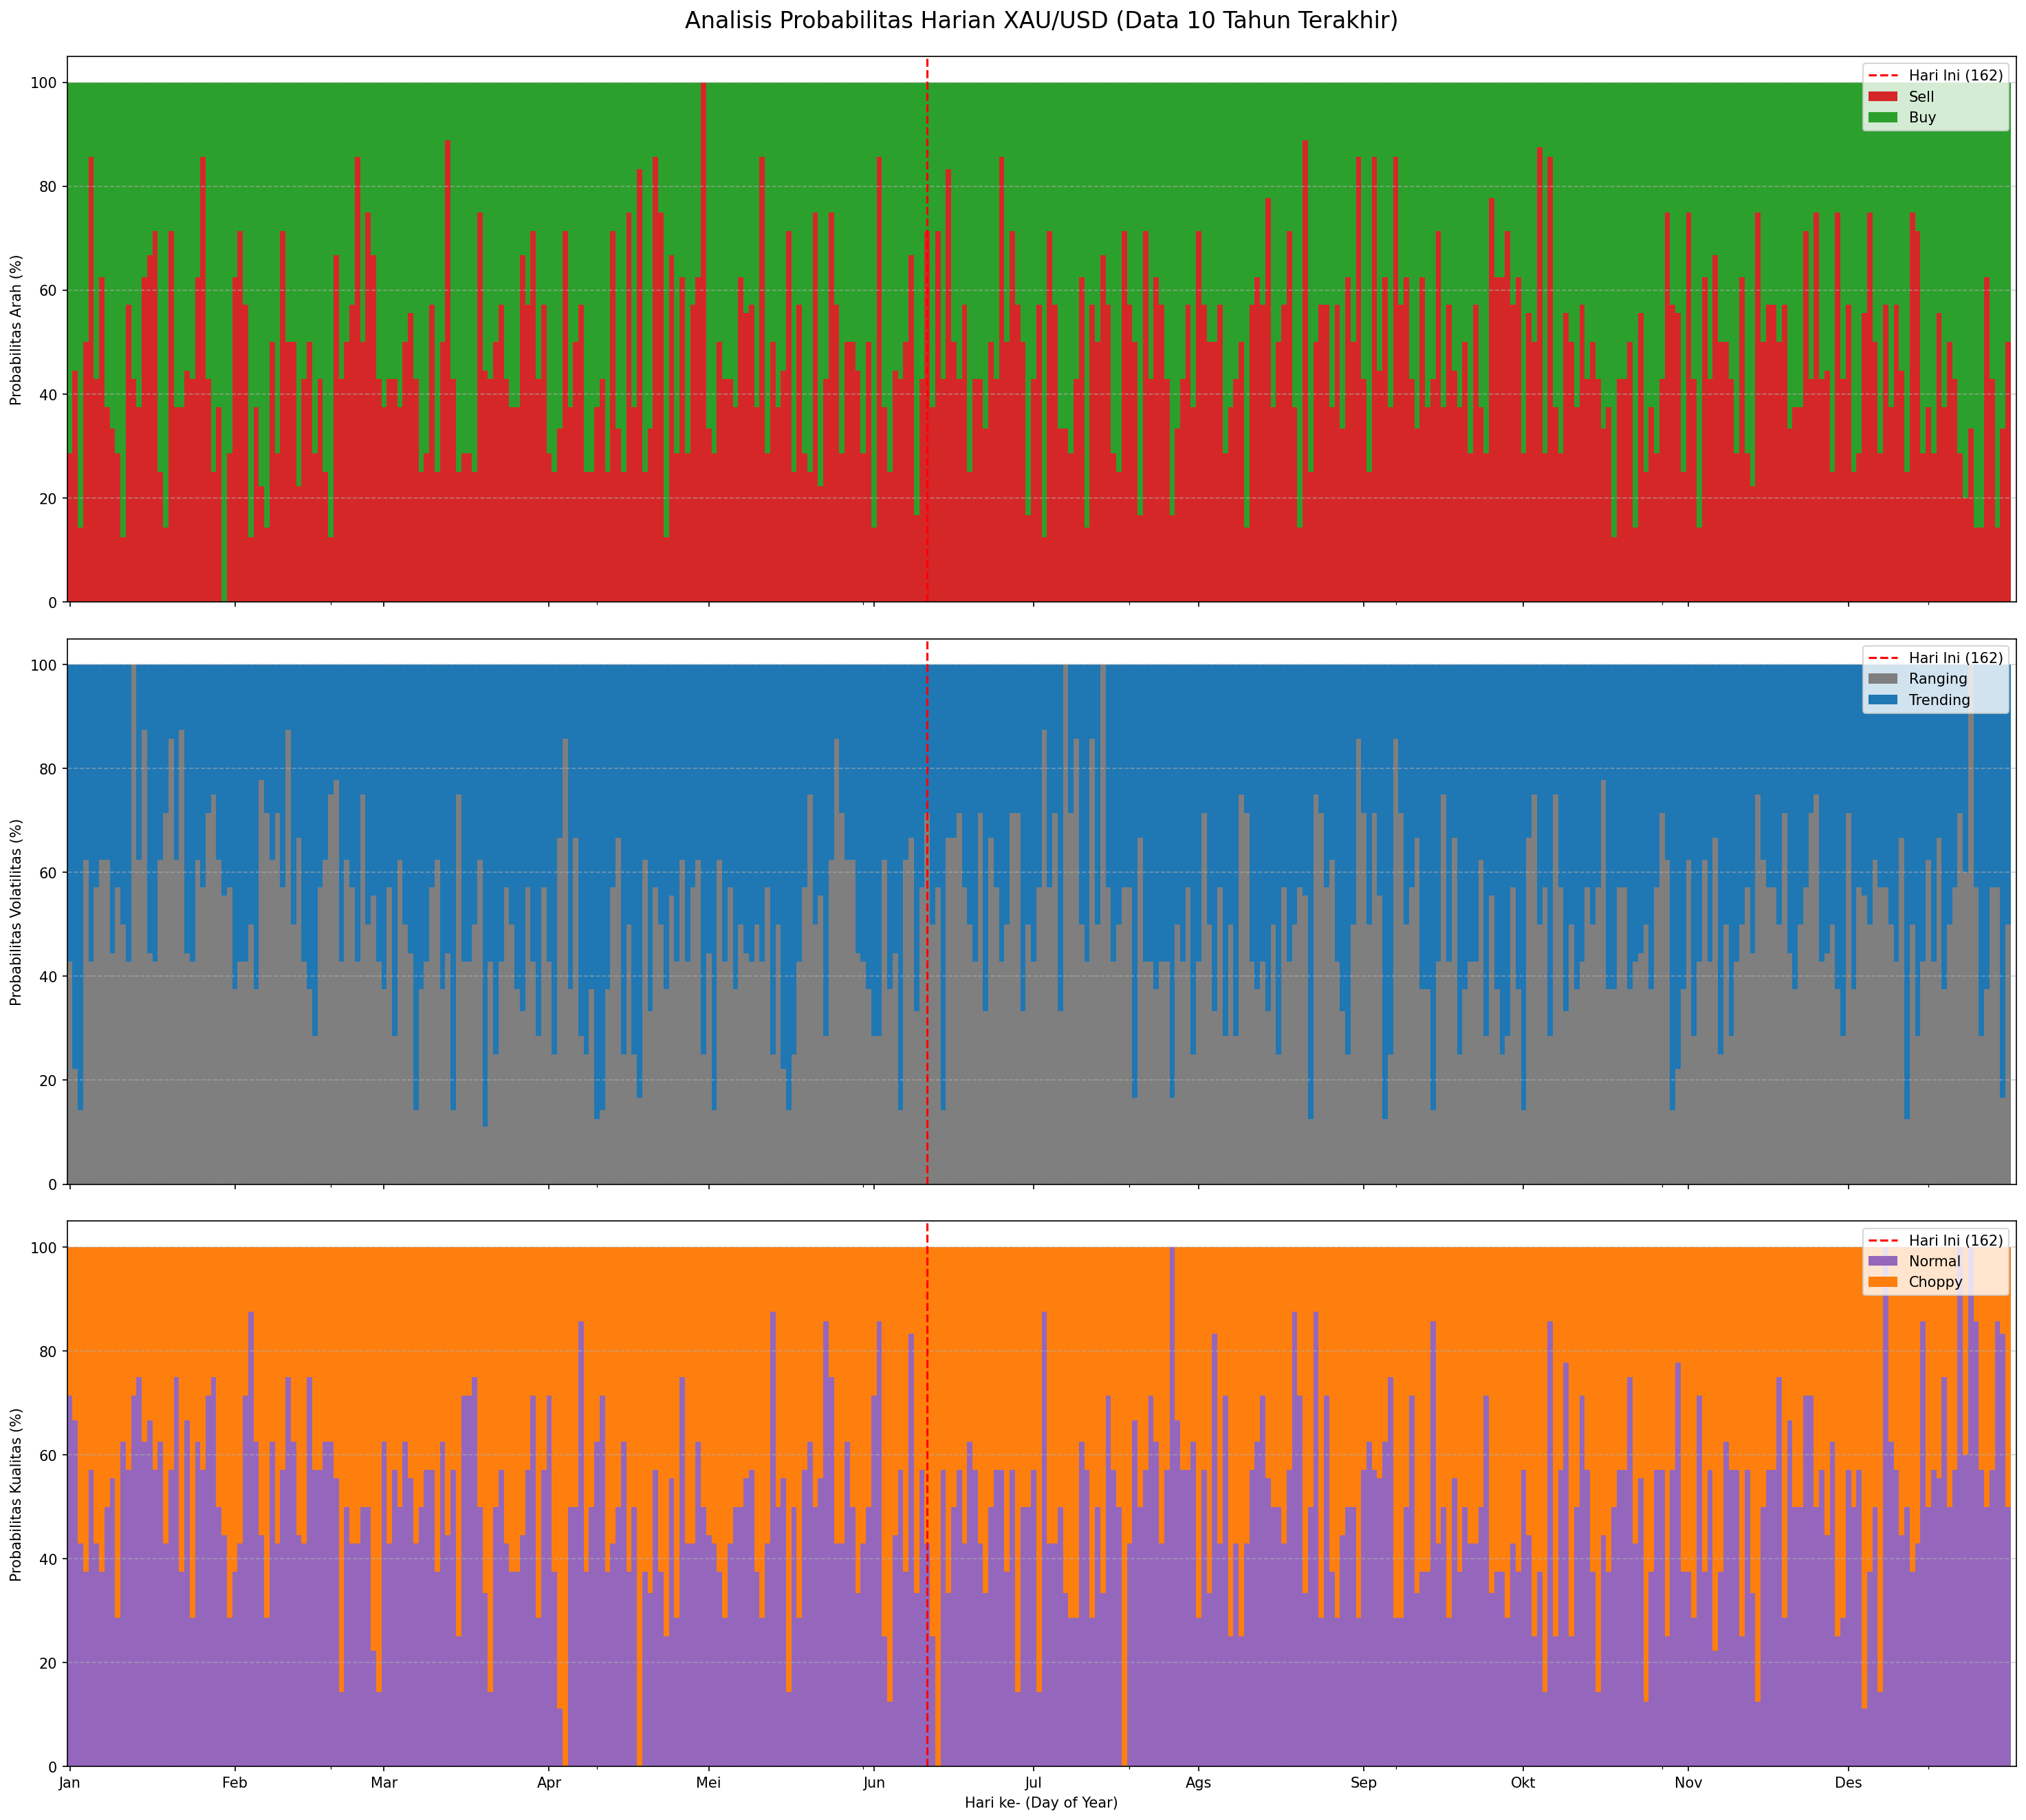


📊 Analisis Probabilitas Harian XAU/USD
📅 Hari ini (11 June 2025) adalah hari ke-162 dalam setahun.

Ringkasan Probabilitas untuk Hari Ini (Hari ke-162)
Berdasarkan data historis 10 tahun terakhir:

--- 1. Probabilitas Arah ---
  🟢 Kecenderungan Buy      : 57.14%
  🔴 Kecenderungan Sell     : 42.86%

--- 2. Probabilitas Volatilitas ---
  🔵 Kecenderungan Trending : 42.86%
  ⚪ Kecenderungan Ranging  : 57.14%

--- 3. Probabilitas Kualitas ---
  🟠 Kecenderungan Choppy   : 42.86%
  🟣 Kecenderungan Normal   : 57.14%



In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

# --- 1. Pengaturan Awal (Folder & Nama File) ---
input_csv_filename = "XAUUSD_Daily_201608090000_202506080000.csv"
today = datetime.now()
today_str = today.strftime('%Y-%m-%d')
output_folder = "Seasonal Data"

# Buat folder jika belum ada
os.makedirs(output_folder, exist_ok=True)

# --- Nama File Output ---
# Hanya definisikan file output untuk ringkasan teks
summary_txt_filename = f"{today_str}-{input_csv_filename.replace('.csv','')} - summary.txt"
summary_txt_filepath = os.path.join(output_folder, summary_txt_filename)


# --- 2. Muat & siapkan data ---
try:
    df = pd.read_csv(input_csv_filename, delim_whitespace=True)
except FileNotFoundError:
    print(f"Error: Pastikan file '{input_csv_filename}' berada di direktori yang sama.")
    exit()

df.columns = [c.strip('<>') for c in df.columns]
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y.%m.%d')
df.set_index('DATE', inplace=True)
df.dropna(inplace=True)

# --- 3. Hitung metrik turunan & klasifikasikan rezim ---
df['direction'] = np.where(df['CLOSE'] > df['OPEN'], 'Buy', 'Sell')
df['range_body'] = (df['CLOSE'] - df['OPEN']).abs()
df['year'] = df.index.year
df['day_of_year'] = df.index.dayofyear

def classify_regimes(group):
    median_range = group['range_body'].quantile(0.5)
    group['regime_volatility'] = np.where(group['range_body'] >= median_range, 'Trending', 'Ranging')
    group['wick_size'] = (df['HIGH'] - df['LOW']) - df['range_body']
    median_wick = group['wick_size'].quantile(0.5)
    group['regime_quality'] = np.where(group['wick_size'] >= median_wick, 'Choppy', 'Normal')
    return group

df = df.groupby('year', group_keys=False).apply(classify_regimes)

# --- 4. Filter data untuk 10 tahun terakhir ---
latest_years = sorted(df['year'].unique())[-10:]
df = df[df['year'].isin(latest_years)]

# --- 5. Hitung probabilitas untuk setiap kategori ---
prob_direction = df.groupby(['day_of_year', 'direction']).size().unstack(fill_value=0).div(df.groupby('day_of_year').size(), axis=0) * 100
prob_volatility = df.groupby(['day_of_year', 'regime_volatility']).size().unstack(fill_value=0).div(df.groupby('day_of_year').size(), axis=0) * 100
prob_quality = df.groupby(['day_of_year', 'regime_quality']).size().unstack(fill_value=0).div(df.groupby('day_of_year').size(), axis=0) * 100

# Dapatkan nomor hari dalam setahun untuk penanda grafik
day_of_year_num = today.timetuple().tm_yday

# --- 6. Buat dan Tampilkan Plot ---
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 18), sharex=True, dpi=150)
colors_direction = {'Buy': '#2ca02c', 'Sell': '#d62728'}
prob_direction.reindex(columns=['Sell', 'Buy']).plot(kind='bar', stacked=True, ax=axes[0], color=colors_direction, width=1.0)
axes[0].set_ylabel('Probabilitas Arah (%)')
axes[0].set_title('Analisis Probabilitas Harian XAU/USD (Data 10 Tahun Terakhir)', pad=20, fontsize=16)

colors_volatility = {'Trending': '#1f77b4', 'Ranging': '#7f7f7f'}
prob_volatility.reindex(columns=['Ranging', 'Trending']).plot(kind='bar', stacked=True, ax=axes[1], color=colors_volatility, width=1.0)
axes[1].set_ylabel('Probabilitas Volatilitas (%)')

colors_quality = {'Normal': '#9467bd', 'Choppy': '#ff7f0e'}
prob_quality.reindex(columns=['Normal', 'Choppy']).plot(kind='bar', stacked=True, ax=axes[2], color=colors_quality, width=1.0)
axes[2].set_ylabel('Probabilitas Kualitas (%)')
axes[2].set_xlabel('Hari ke- (Day of Year)')

for ax in axes:
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.axvline(x=day_of_year_num, color='red', linestyle='--', linewidth=1.5, label=f'Hari Ini ({day_of_year_num})')
    ax.legend(loc='upper right')

tick_locations = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
tick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des']
plt.xticks(ticks=tick_locations, labels=tick_labels, rotation=0, ha='center')
plt.xlim(0.5, 366.5)

fig.tight_layout(pad=2.0)
# Grafik hanya ditampilkan, tidak disimpan
print("Menampilkan grafik di layar...")
plt.show()

# --- 7. Buat Teks Ringkasan ---
summary_lines = []
summary_lines.append(f"📊 Analisis Probabilitas Harian XAU/USD")
summary_lines.append(f"📅 Hari ini ({today.strftime('%d %B %Y')}) adalah hari ke-{day_of_year_num} dalam setahun.")
summary_lines.append("\n" + "="*55)
summary_lines.append(f"Ringkasan Probabilitas untuk Hari Ini (Hari ke-{day_of_year_num})")
summary_lines.append("Berdasarkan data historis 10 tahun terakhir:")
summary_lines.append("="*55)

def get_prob_details_lines(name, prob_df, day_num, labels_colors):
    lines = []
    lines.append(f"\n--- {name} ---")
    if day_num in prob_df.index:
        for label, color_char in labels_colors.items():
            prob = prob_df.loc[day_num].get(label, 0)
            lines.append(f"  {color_char} Kecenderungan {label.ljust(9)}: {prob:.2f}%")
    else:
        lines.append("  Data tidak tersedia.")
    return lines

summary_lines.extend(get_prob_details_lines("1. Probabilitas Arah", prob_direction, day_of_year_num, {'Buy': '🟢', 'Sell': '🔴'}))
summary_lines.extend(get_prob_details_lines("2. Probabilitas Volatilitas", prob_volatility, day_of_year_num, {'Trending': '🔵', 'Ranging': '⚪'}))
summary_lines.extend(get_prob_details_lines("3. Probabilitas Kualitas", prob_quality, day_of_year_num, {'Choppy': '🟠', 'Normal': '🟣'}))
summary_lines.append("\n" + "="*55)

summary_text = "\n".join(summary_lines)
# Tampilkan ringkasan di konsol
print("\n" + summary_text)

Menampilkan grafik di layar...


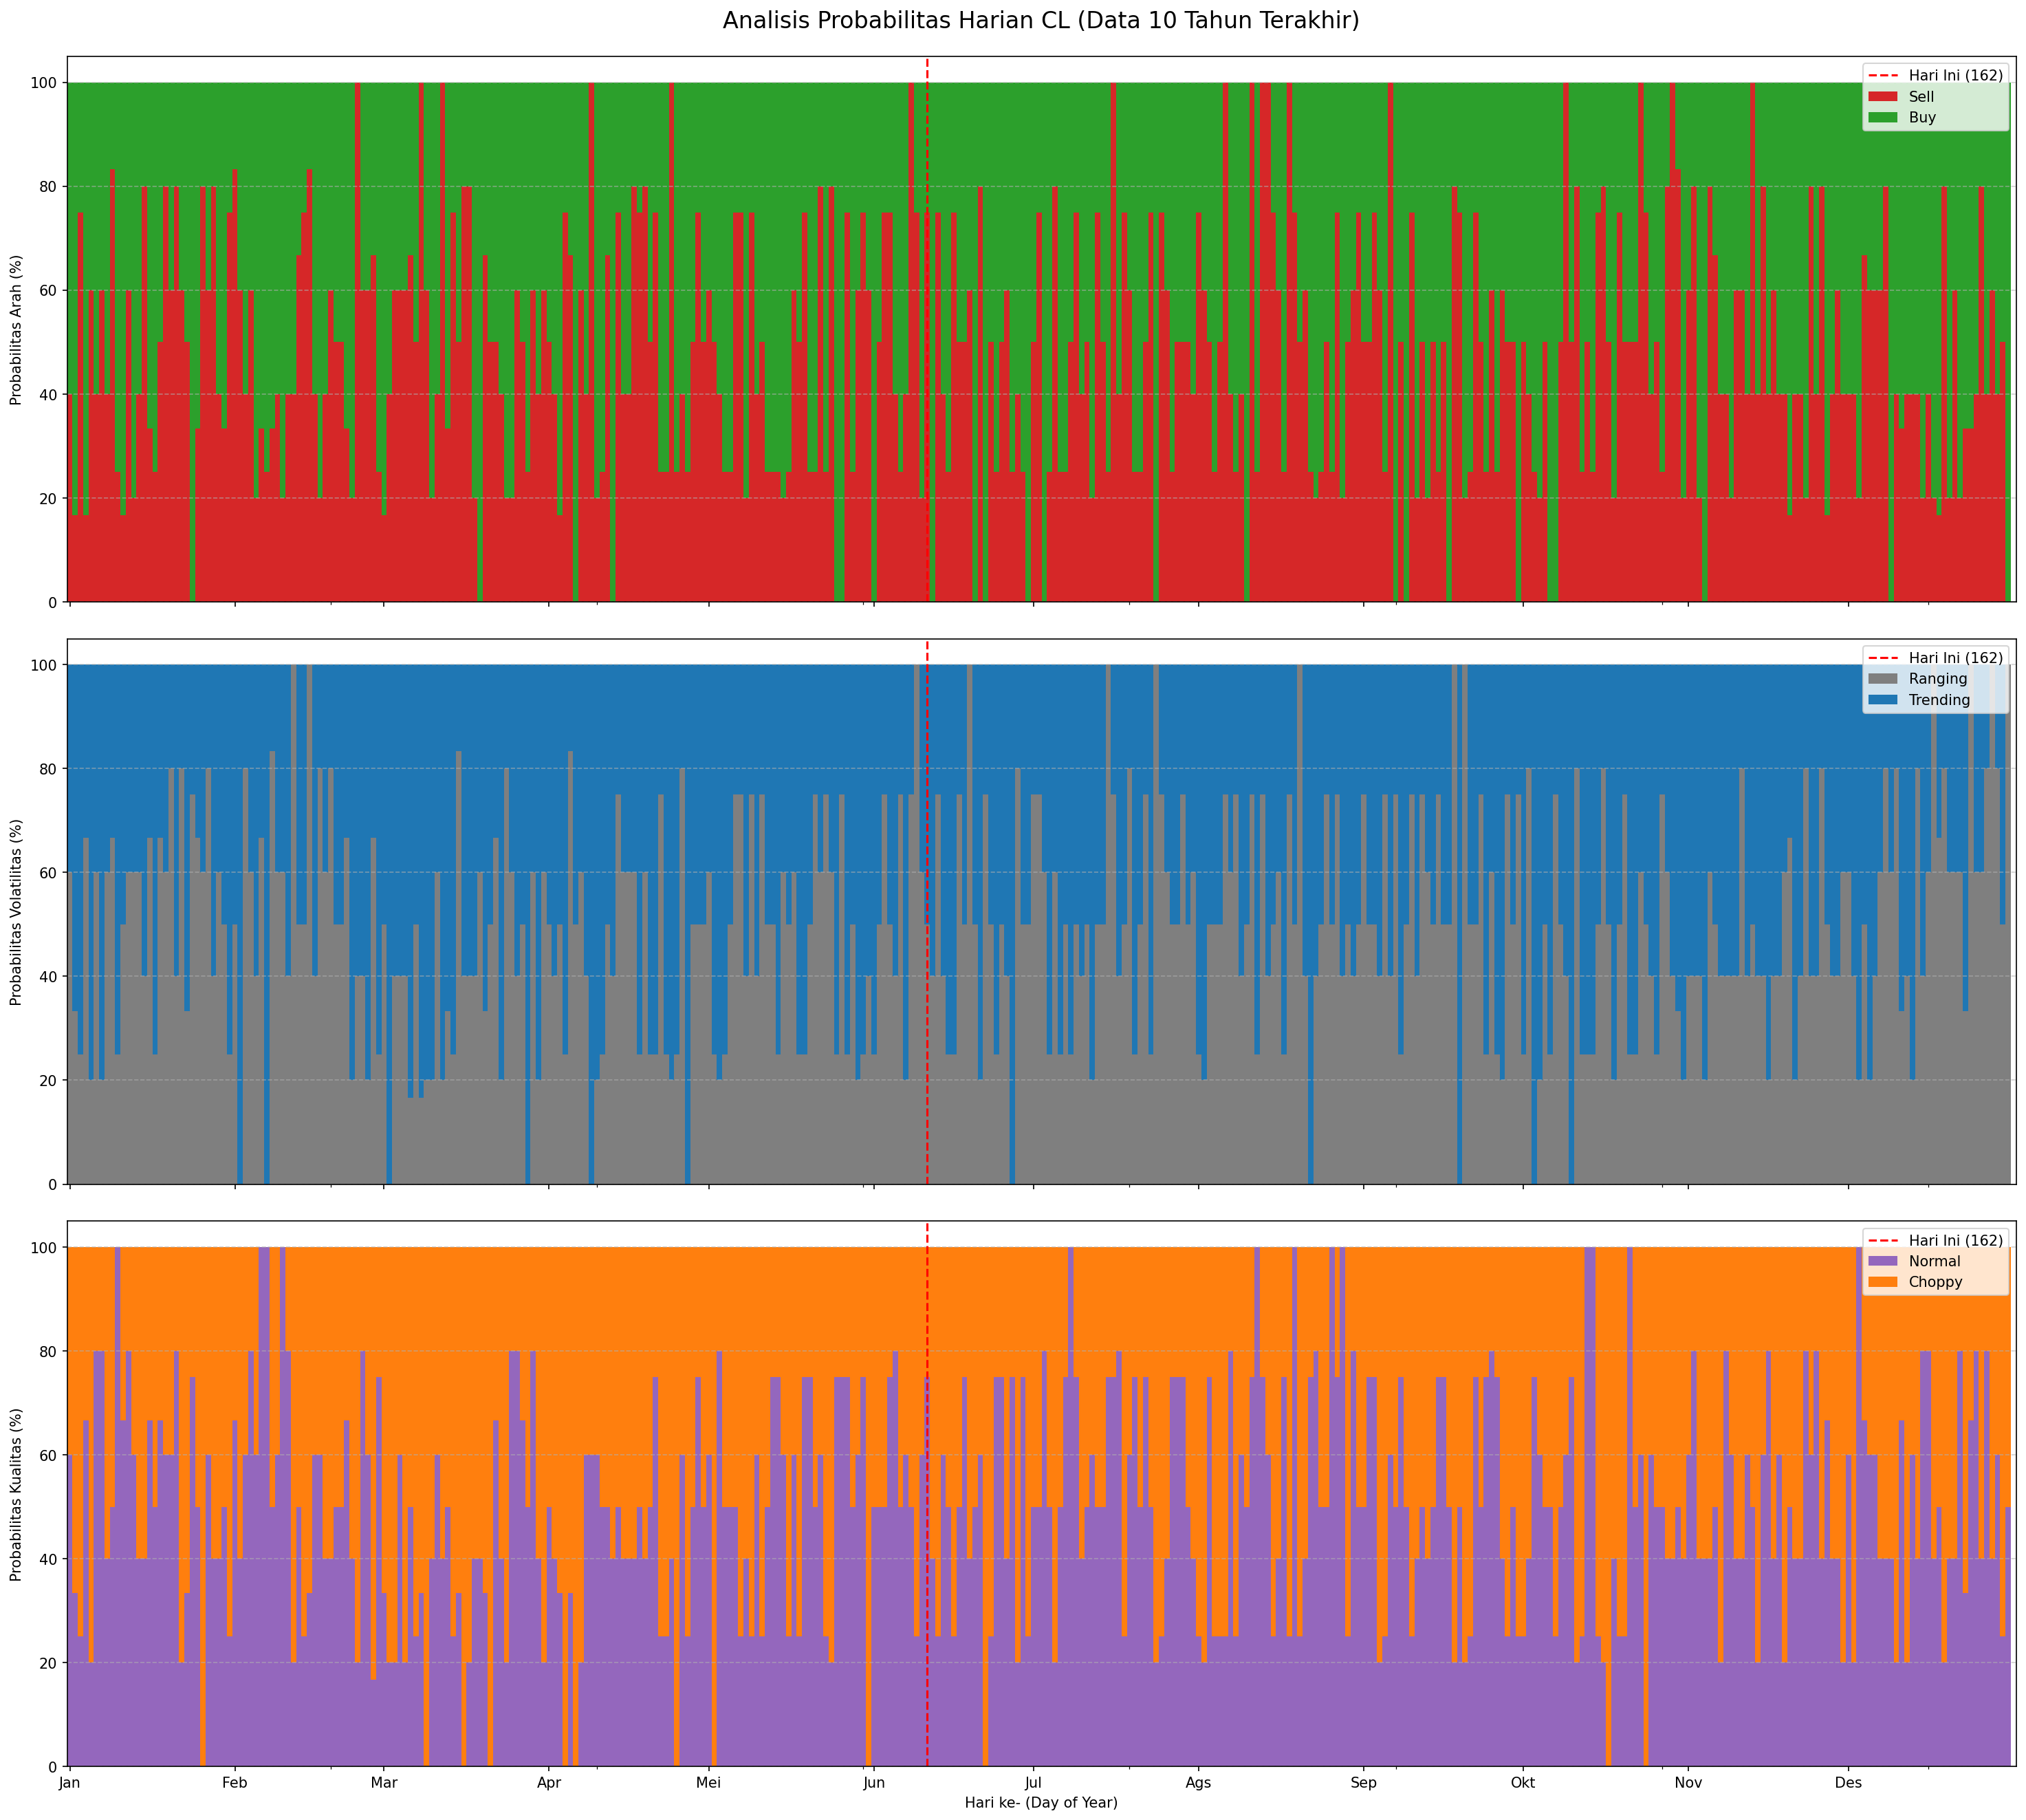


📊 Analisis Probabilitas Harian CL
📅 Hari ini (11 June 2025) adalah hari ke-162 dalam setahun.

Ringkasan Probabilitas untuk Hari Ini (Hari ke-162)
Berdasarkan data historis 10 tahun terakhir:

--- 1. Probabilitas Arah ---
  🟢 Kecenderungan Buy      : 80.00%
  🔴 Kecenderungan Sell     : 20.00%

--- 2. Probabilitas Volatilitas ---
  🔵 Kecenderungan Trending : 40.00%
  ⚪ Kecenderungan Ranging  : 60.00%

--- 3. Probabilitas Kualitas ---
  🟠 Kecenderungan Choppy   : 40.00%
  🟣 Kecenderungan Normal   : 60.00%



In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

# --- 1. Pengaturan Awal (Folder & Nama File) ---
input_csv_filename = "USOIL_Daily_201910290000_202506110000.csv"
today = datetime.now()
today_str = today.strftime('%Y-%m-%d')
output_folder = "Seasonal Data"

# Buat folder jika belum ada
os.makedirs(output_folder, exist_ok=True)

# --- Nama File Output ---
# Hanya definisikan file output untuk ringkasan teks
summary_txt_filename = f"{today_str}-{input_csv_filename.replace('.csv','')} - summary.txt"
summary_txt_filepath = os.path.join(output_folder, summary_txt_filename)


# --- 2. Muat & siapkan data ---
try:
    df = pd.read_csv(input_csv_filename, delim_whitespace=True)
except FileNotFoundError:
    print(f"Error: Pastikan file '{input_csv_filename}' berada di direktori yang sama.")
    exit()

df.columns = [c.strip('<>') for c in df.columns]
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y.%m.%d')
df.set_index('DATE', inplace=True)
df.dropna(inplace=True)

# --- 3. Hitung metrik turunan & klasifikasikan rezim ---
df['direction'] = np.where(df['CLOSE'] > df['OPEN'], 'Buy', 'Sell')
df['range_body'] = (df['CLOSE'] - df['OPEN']).abs()
df['year'] = df.index.year
df['day_of_year'] = df.index.dayofyear

def classify_regimes(group):
    median_range = group['range_body'].quantile(0.5)
    group['regime_volatility'] = np.where(group['range_body'] >= median_range, 'Trending', 'Ranging')
    group['wick_size'] = (df['HIGH'] - df['LOW']) - df['range_body']
    median_wick = group['wick_size'].quantile(0.5)
    group['regime_quality'] = np.where(group['wick_size'] >= median_wick, 'Choppy', 'Normal')
    return group

df = df.groupby('year', group_keys=False).apply(classify_regimes)

# --- 4. Filter data untuk 10 tahun terakhir ---
latest_years = sorted(df['year'].unique())[-10:]
df = df[df['year'].isin(latest_years)]

# --- 5. Hitung probabilitas untuk setiap kategori ---
prob_direction = df.groupby(['day_of_year', 'direction']).size().unstack(fill_value=0).div(df.groupby('day_of_year').size(), axis=0) * 100
prob_volatility = df.groupby(['day_of_year', 'regime_volatility']).size().unstack(fill_value=0).div(df.groupby('day_of_year').size(), axis=0) * 100
prob_quality = df.groupby(['day_of_year', 'regime_quality']).size().unstack(fill_value=0).div(df.groupby('day_of_year').size(), axis=0) * 100

# Dapatkan nomor hari dalam setahun untuk penanda grafik
day_of_year_num = today.timetuple().tm_yday

# --- 6. Buat dan Tampilkan Plot ---
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 18), sharex=True, dpi=150)
colors_direction = {'Buy': '#2ca02c', 'Sell': '#d62728'}
prob_direction.reindex(columns=['Sell', 'Buy']).plot(kind='bar', stacked=True, ax=axes[0], color=colors_direction, width=1.0)
axes[0].set_ylabel('Probabilitas Arah (%)')
axes[0].set_title('Analisis Probabilitas Harian CL (Data 10 Tahun Terakhir)', pad=20, fontsize=16)

colors_volatility = {'Trending': '#1f77b4', 'Ranging': '#7f7f7f'}
prob_volatility.reindex(columns=['Ranging', 'Trending']).plot(kind='bar', stacked=True, ax=axes[1], color=colors_volatility, width=1.0)
axes[1].set_ylabel('Probabilitas Volatilitas (%)')

colors_quality = {'Normal': '#9467bd', 'Choppy': '#ff7f0e'}
prob_quality.reindex(columns=['Normal', 'Choppy']).plot(kind='bar', stacked=True, ax=axes[2], color=colors_quality, width=1.0)
axes[2].set_ylabel('Probabilitas Kualitas (%)')
axes[2].set_xlabel('Hari ke- (Day of Year)')

for ax in axes:
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.axvline(x=day_of_year_num, color='red', linestyle='--', linewidth=1.5, label=f'Hari Ini ({day_of_year_num})')
    ax.legend(loc='upper right')

tick_locations = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
tick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des']
plt.xticks(ticks=tick_locations, labels=tick_labels, rotation=0, ha='center')
plt.xlim(0.5, 366.5)

fig.tight_layout(pad=2.0)
# Grafik hanya ditampilkan, tidak disimpan
print("Menampilkan grafik di layar...")
plt.show()

# --- 7. Buat Teks Ringkasan ---
summary_lines = []
summary_lines.append(f"📊 Analisis Probabilitas Harian CL")
summary_lines.append(f"📅 Hari ini ({today.strftime('%d %B %Y')}) adalah hari ke-{day_of_year_num} dalam setahun.")
summary_lines.append("\n" + "="*55)
summary_lines.append(f"Ringkasan Probabilitas untuk Hari Ini (Hari ke-{day_of_year_num})")
summary_lines.append("Berdasarkan data historis 10 tahun terakhir:")
summary_lines.append("="*55)

def get_prob_details_lines(name, prob_df, day_num, labels_colors):
    lines = []
    lines.append(f"\n--- {name} ---")
    if day_num in prob_df.index:
        for label, color_char in labels_colors.items():
            prob = prob_df.loc[day_num].get(label, 0)
            lines.append(f"  {color_char} Kecenderungan {label.ljust(9)}: {prob:.2f}%")
    else:
        lines.append("  Data tidak tersedia.")
    return lines

summary_lines.extend(get_prob_details_lines("1. Probabilitas Arah", prob_direction, day_of_year_num, {'Buy': '🟢', 'Sell': '🔴'}))
summary_lines.extend(get_prob_details_lines("2. Probabilitas Volatilitas", prob_volatility, day_of_year_num, {'Trending': '🔵', 'Ranging': '⚪'}))
summary_lines.extend(get_prob_details_lines("3. Probabilitas Kualitas", prob_quality, day_of_year_num, {'Choppy': '🟠', 'Normal': '🟣'}))
summary_lines.append("\n" + "="*55)

summary_text = "\n".join(summary_lines)
# Tampilkan ringkasan di konsol
print("\n" + summary_text)

Menampilkan grafik di layar...


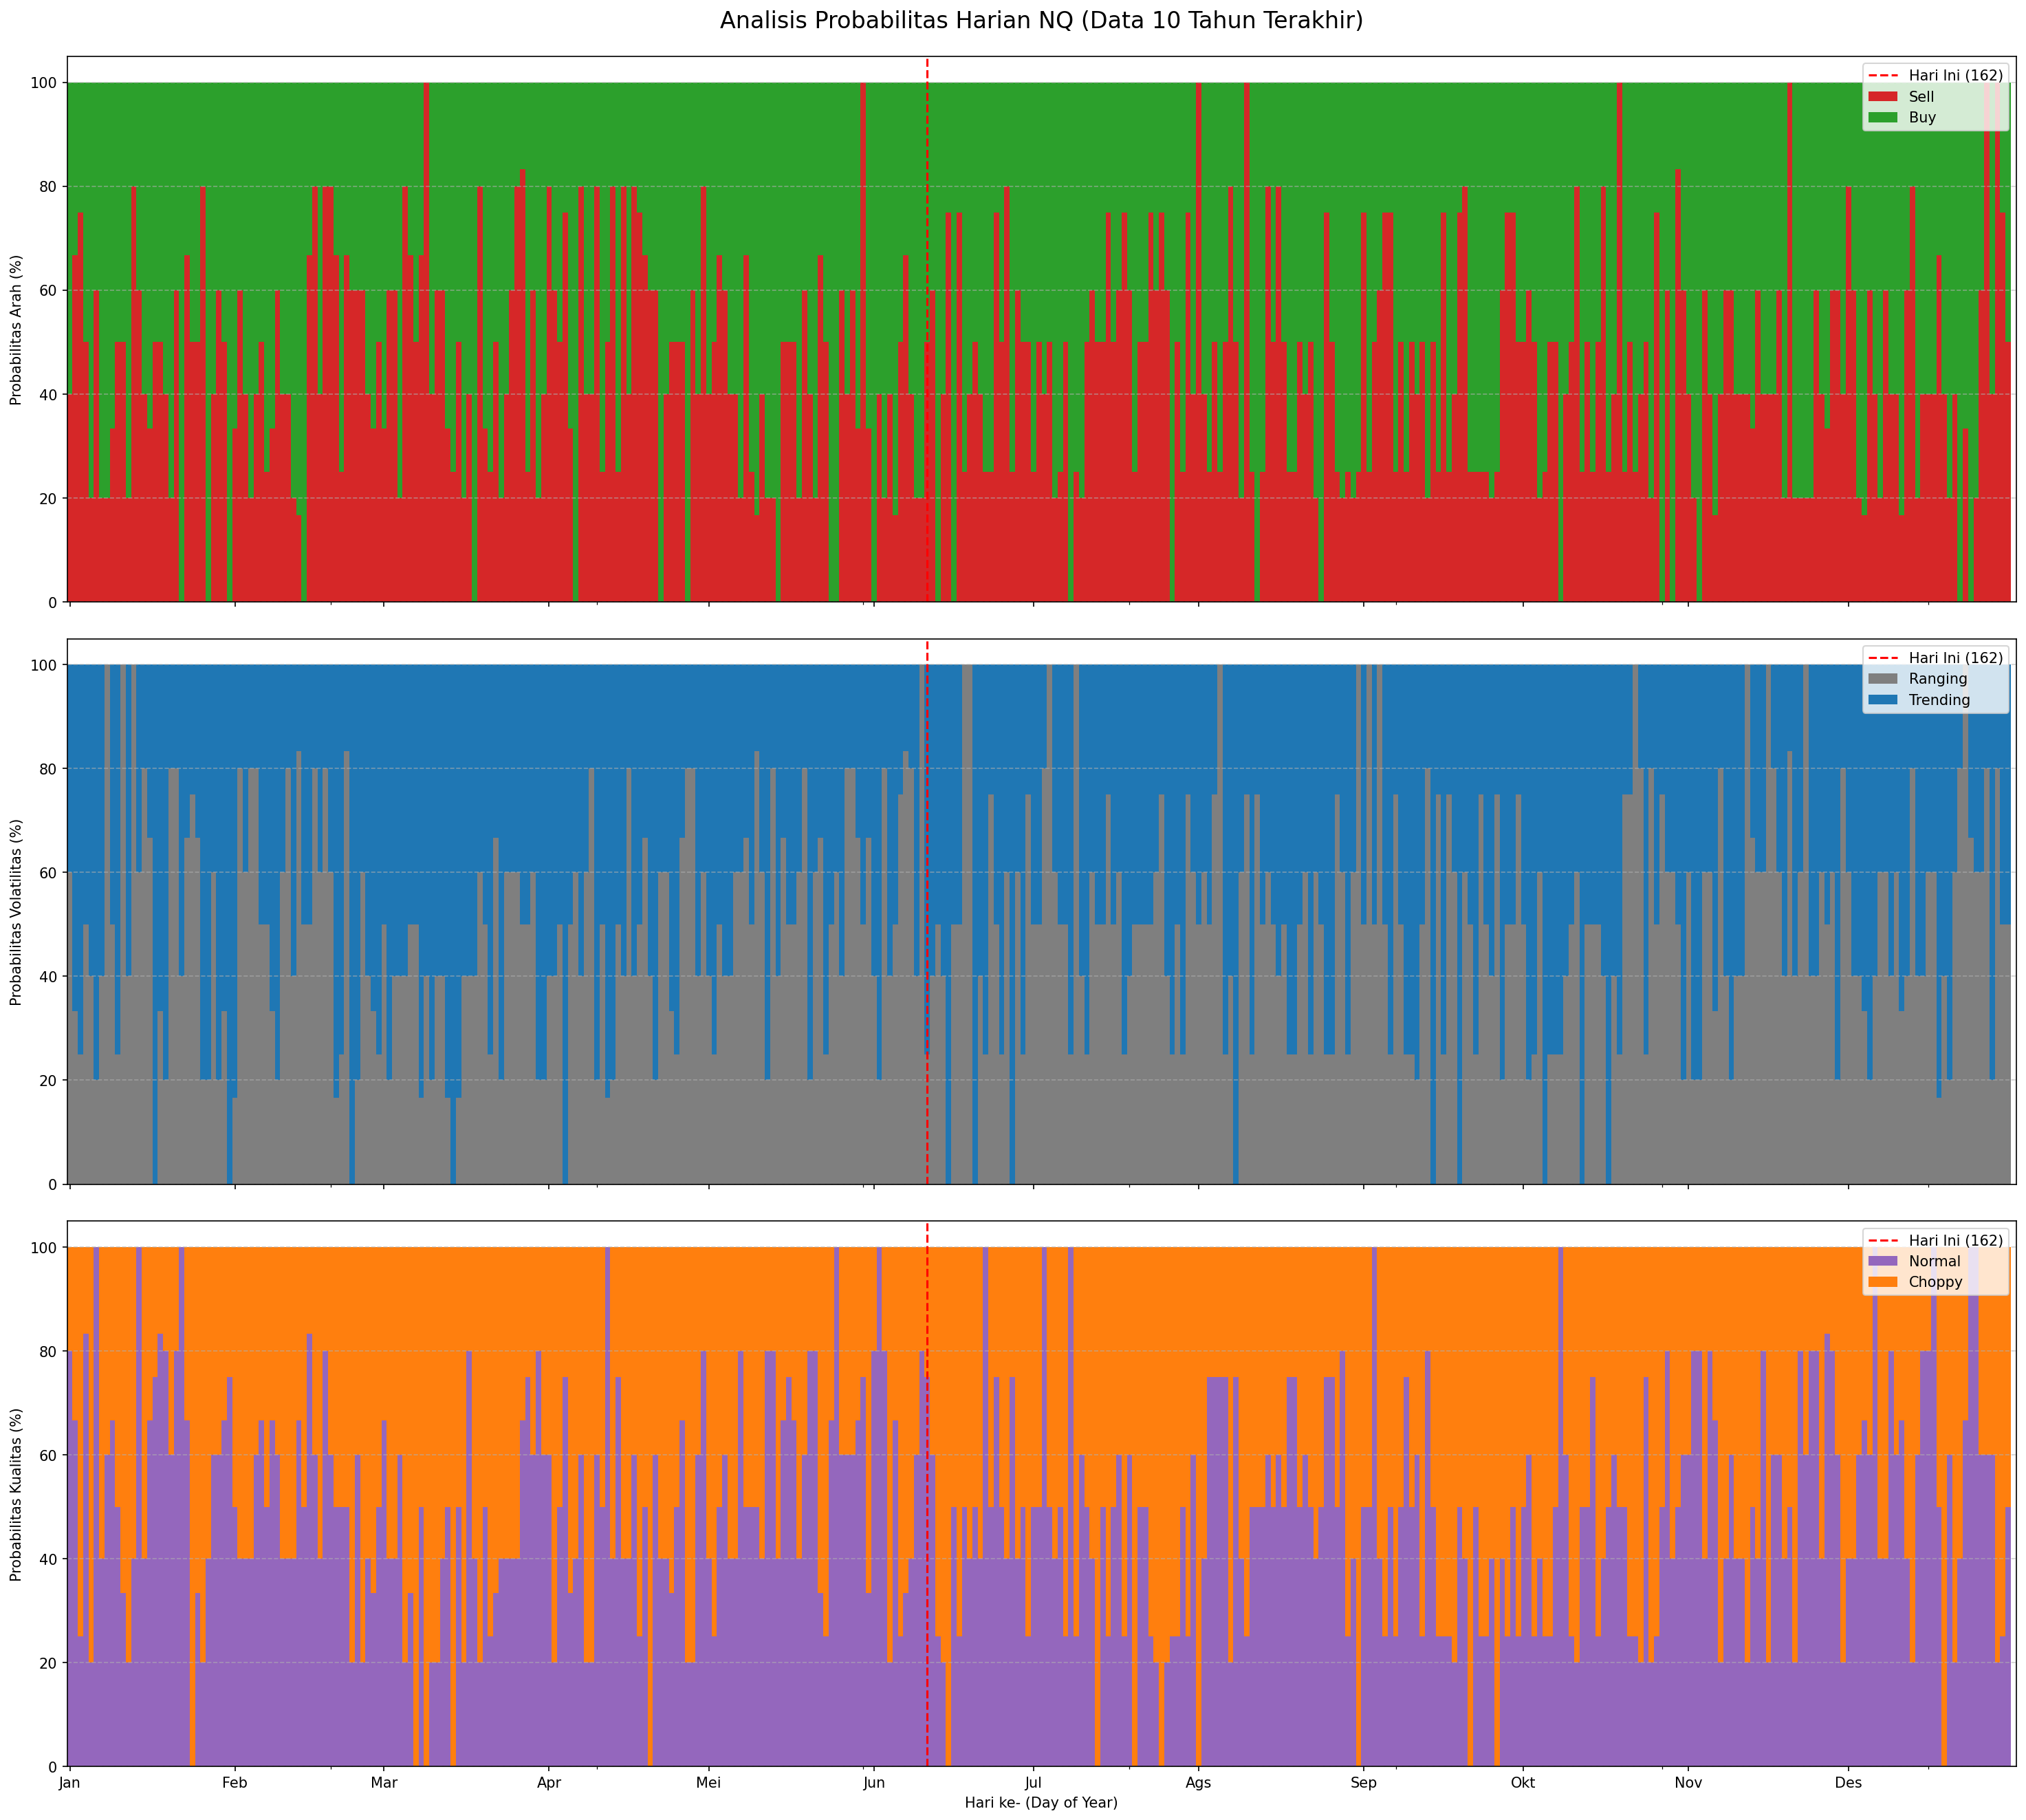


📊 Analisis Probabilitas Harian NQ
📅 Hari ini (11 June 2025) adalah hari ke-162 dalam setahun.

Ringkasan Probabilitas untuk Hari Ini (Hari ke-162)
Berdasarkan data historis 10 tahun terakhir:

--- 1. Probabilitas Arah ---
  🟢 Kecenderungan Buy      : 80.00%
  🔴 Kecenderungan Sell     : 20.00%

--- 2. Probabilitas Volatilitas ---
  🔵 Kecenderungan Trending : 0.00%
  ⚪ Kecenderungan Ranging  : 100.00%

--- 3. Probabilitas Kualitas ---
  🟠 Kecenderungan Choppy   : 20.00%
  🟣 Kecenderungan Normal   : 80.00%



In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

# --- 1. Pengaturan Awal (Folder & Nama File) ---
input_csv_filename = "USTEC_Daily_201910290000_202506110000.csv"
today = datetime.now()
today_str = today.strftime('%Y-%m-%d')
output_folder = "Seasonal Data"

# Buat folder jika belum ada
os.makedirs(output_folder, exist_ok=True)

# --- Nama File Output ---
# Hanya definisikan file output untuk ringkasan teks
summary_txt_filename = f"{today_str}-{input_csv_filename.replace('.csv','')} - summary.txt"
summary_txt_filepath = os.path.join(output_folder, summary_txt_filename)


# --- 2. Muat & siapkan data ---
try:
    df = pd.read_csv(input_csv_filename, delim_whitespace=True)
except FileNotFoundError:
    print(f"Error: Pastikan file '{input_csv_filename}' berada di direktori yang sama.")
    exit()

df.columns = [c.strip('<>') for c in df.columns]
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y.%m.%d')
df.set_index('DATE', inplace=True)
df.dropna(inplace=True)

# --- 3. Hitung metrik turunan & klasifikasikan rezim ---
df['direction'] = np.where(df['CLOSE'] > df['OPEN'], 'Buy', 'Sell')
df['range_body'] = (df['CLOSE'] - df['OPEN']).abs()
df['year'] = df.index.year
df['day_of_year'] = df.index.dayofyear

def classify_regimes(group):
    median_range = group['range_body'].quantile(0.5)
    group['regime_volatility'] = np.where(group['range_body'] >= median_range, 'Trending', 'Ranging')
    group['wick_size'] = (df['HIGH'] - df['LOW']) - df['range_body']
    median_wick = group['wick_size'].quantile(0.5)
    group['regime_quality'] = np.where(group['wick_size'] >= median_wick, 'Choppy', 'Normal')
    return group

df = df.groupby('year', group_keys=False).apply(classify_regimes)

# --- 4. Filter data untuk 10 tahun terakhir ---
latest_years = sorted(df['year'].unique())[-10:]
df = df[df['year'].isin(latest_years)]

# --- 5. Hitung probabilitas untuk setiap kategori ---
prob_direction = df.groupby(['day_of_year', 'direction']).size().unstack(fill_value=0).div(df.groupby('day_of_year').size(), axis=0) * 100
prob_volatility = df.groupby(['day_of_year', 'regime_volatility']).size().unstack(fill_value=0).div(df.groupby('day_of_year').size(), axis=0) * 100
prob_quality = df.groupby(['day_of_year', 'regime_quality']).size().unstack(fill_value=0).div(df.groupby('day_of_year').size(), axis=0) * 100

# Dapatkan nomor hari dalam setahun untuk penanda grafik
day_of_year_num = today.timetuple().tm_yday

# --- 6. Buat dan Tampilkan Plot ---
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 18), sharex=True, dpi=150)
colors_direction = {'Buy': '#2ca02c', 'Sell': '#d62728'}
prob_direction.reindex(columns=['Sell', 'Buy']).plot(kind='bar', stacked=True, ax=axes[0], color=colors_direction, width=1.0)
axes[0].set_ylabel('Probabilitas Arah (%)')
axes[0].set_title('Analisis Probabilitas Harian NQ (Data 10 Tahun Terakhir)', pad=20, fontsize=16)

colors_volatility = {'Trending': '#1f77b4', 'Ranging': '#7f7f7f'}
prob_volatility.reindex(columns=['Ranging', 'Trending']).plot(kind='bar', stacked=True, ax=axes[1], color=colors_volatility, width=1.0)
axes[1].set_ylabel('Probabilitas Volatilitas (%)')

colors_quality = {'Normal': '#9467bd', 'Choppy': '#ff7f0e'}
prob_quality.reindex(columns=['Normal', 'Choppy']).plot(kind='bar', stacked=True, ax=axes[2], color=colors_quality, width=1.0)
axes[2].set_ylabel('Probabilitas Kualitas (%)')
axes[2].set_xlabel('Hari ke- (Day of Year)')

for ax in axes:
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.axvline(x=day_of_year_num, color='red', linestyle='--', linewidth=1.5, label=f'Hari Ini ({day_of_year_num})')
    ax.legend(loc='upper right')

tick_locations = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
tick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des']
plt.xticks(ticks=tick_locations, labels=tick_labels, rotation=0, ha='center')
plt.xlim(0.5, 366.5)

fig.tight_layout(pad=2.0)
# Grafik hanya ditampilkan, tidak disimpan
print("Menampilkan grafik di layar...")
plt.show()

# --- 7. Buat Teks Ringkasan ---
summary_lines = []
summary_lines.append(f"📊 Analisis Probabilitas Harian NQ")
summary_lines.append(f"📅 Hari ini ({today.strftime('%d %B %Y')}) adalah hari ke-{day_of_year_num} dalam setahun.")
summary_lines.append("\n" + "="*55)
summary_lines.append(f"Ringkasan Probabilitas untuk Hari Ini (Hari ke-{day_of_year_num})")
summary_lines.append("Berdasarkan data historis 10 tahun terakhir:")
summary_lines.append("="*55)

def get_prob_details_lines(name, prob_df, day_num, labels_colors):
    lines = []
    lines.append(f"\n--- {name} ---")
    if day_num in prob_df.index:
        for label, color_char in labels_colors.items():
            prob = prob_df.loc[day_num].get(label, 0)
            lines.append(f"  {color_char} Kecenderungan {label.ljust(9)}: {prob:.2f}%")
    else:
        lines.append("  Data tidak tersedia.")
    return lines

summary_lines.extend(get_prob_details_lines("1. Probabilitas Arah", prob_direction, day_of_year_num, {'Buy': '🟢', 'Sell': '🔴'}))
summary_lines.extend(get_prob_details_lines("2. Probabilitas Volatilitas", prob_volatility, day_of_year_num, {'Trending': '🔵', 'Ranging': '⚪'}))
summary_lines.extend(get_prob_details_lines("3. Probabilitas Kualitas", prob_quality, day_of_year_num, {'Choppy': '🟠', 'Normal': '🟣'}))
summary_lines.append("\n" + "="*55)

summary_text = "\n".join(summary_lines)
# Tampilkan ringkasan di konsol
print("\n" + summary_text)
